# Analysis of UCI Categorical Data with Decision Trees

One of the dataset from the collection of datasets will be used for the analysis. The collection of dataset can be accessed using this [link](https://pages.stern.nyu.edu/~jsimonof/AnalCatData/).

## Importing Required Modules

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import graphviz

## Task 1 - Reading Dataset

Reading the dataset using Pandas
- Assuming that the dataset is in the same directory as the jupyter notebook
- Using ';' as separator

In [2]:
df = pd.read_csv("2_analcatdata_broadway.csv", sep=";")

In [3]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.000000,-0.166665,0.599889,0
1,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.500000,0.956251,0
2,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.833335,-0.333335,0.636162,1
3,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,0.833335,0.074069,0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,0.833335,0.699294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.500000,0.666665,0.327149,0
91,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.000000,1.000000,0.886197,0
92,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-1.000000,0.746920,0
93,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.500000,-0.500000,-0.316074,0


## Task 2 - Seperating and Splitting

First seperating the dataset into features and labels and then splitting them into 20% test and 80% train datasets

In [4]:
# Separating features and labels
X = df.loc[:,df.columns!="label"]
y = df["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
X_test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24
14,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.166665,0.649176
11,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.333335,1.000000,0.739997
25,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.500000,-0.016475
40,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.666665,0.500000,0.451474
55,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,-0.333335,0.863492
37,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.500000,-0.254880
0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.000000,-0.166665,0.599889
59,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,-0.333335,0.569708
41,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.666665,0.327980
79,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.166665,1.000000,-0.640593


## Task 3 - Building the Classifier, calculating Accuracy and Plotting using Matplotlib
- Used sklearn to build a Decision Tree Classifier
- Fit the classifier on train set
- Made predictions using the classifier
- Calculated accuracy using module provided by sklearn
- Extended the working to varying depths of the tree
- Visualizing using matplotlib

In [7]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X,y)

Trying it out on the test set before running it properly

In [8]:
y_pred = decision_tree.predict(X_test)

### Visualizing using built in Tools provided by Sklearn
Using built in tools to visualize the tree to better see and understand things

[Text(442.85714285714283, 543.6, 'X[19] <= 0.0\nentropy = 1.409\nsamples = 76\nvalue = [52, 11, 9, 1, 3]'),
 Text(354.2857142857143, 422.8, 'X[18] <= 0.0\nentropy = 1.613\nsamples = 24\nvalue = [0, 11, 9, 1, 3]'),
 Text(265.7142857142857, 302.0, 'X[16] <= 0.0\nentropy = 1.14\nsamples = 13\nvalue = [0, 0, 9, 1, 3]'),
 Text(177.14285714285714, 181.2, 'X[1] <= 0.0\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 0, 1, 3]'),
 Text(88.57142857142857, 60.39999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(265.7142857142857, 60.39999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(354.2857142857143, 181.2, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0, 0]'),
 Text(442.85714285714283, 302.0, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(531.4285714285714, 422.8, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0, 0, 0, 0]')]

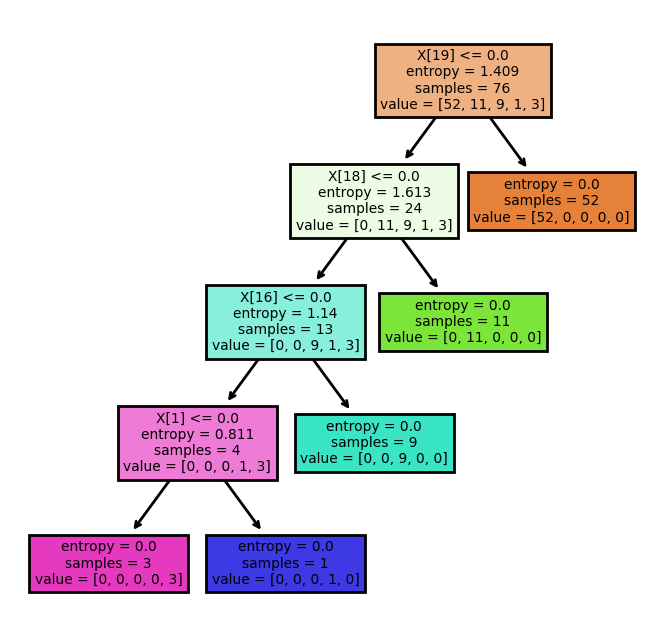

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(decision_tree, filled=True)

Looking at prediction accuracy for the test

In [10]:
accuracy_score(y_test, y_pred)

1.0

## Running the classifier for all values of depth

In [18]:
predicion_array = {'train_acc':[], 'test_acc':[], 'train_error':[], 'test_error':[]}
for i in range(len(X.columns)):
    decision_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i+1)
    decision_tree = decision_tree.fit(X_train,y_train)
    train_pred = decision_tree.predict(X_train)
    test_pred = decision_tree.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    predicion_array['train_acc'].append(train_accuracy)
    predicion_array['test_acc'].append(test_accuracy)
    predicion_array['train_error'].append(1 - train_accuracy)
    predicion_array['test_error'].append(1 - test_accuracy)

In [19]:
predicion_array

{'train_acc': [0.8289473684210527,
  0.9473684210526315,
  0.9868421052631579,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'test_acc': [0.8421052631578947,
  0.9473684210526315,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'train_error': [0.17105263157894735,
  0.052631578947368474,
  0.013157894736842146,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'test_error': [0.1578947368421053,
  0.052631578947368474,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

### Plotting Train and Test Accuracy

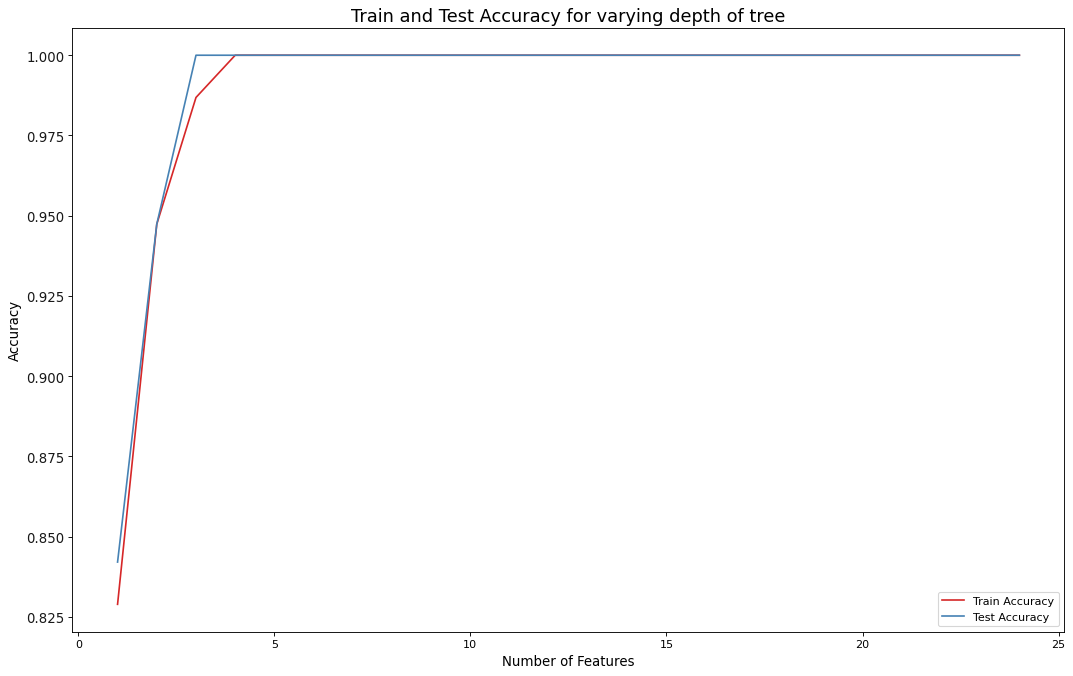

In [20]:
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(no_of_features, predicion_array['train_acc'], color='tab:red', label='Train Accuracy')
plt.plot(no_of_features, predicion_array['test_acc'], color="steelblue", label='Test Accuracy')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Number of Features", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Accuracy for varying depth of tree", fontsize=16)
plt.legend()
plt.show()

### Plotting Train and Test Errors

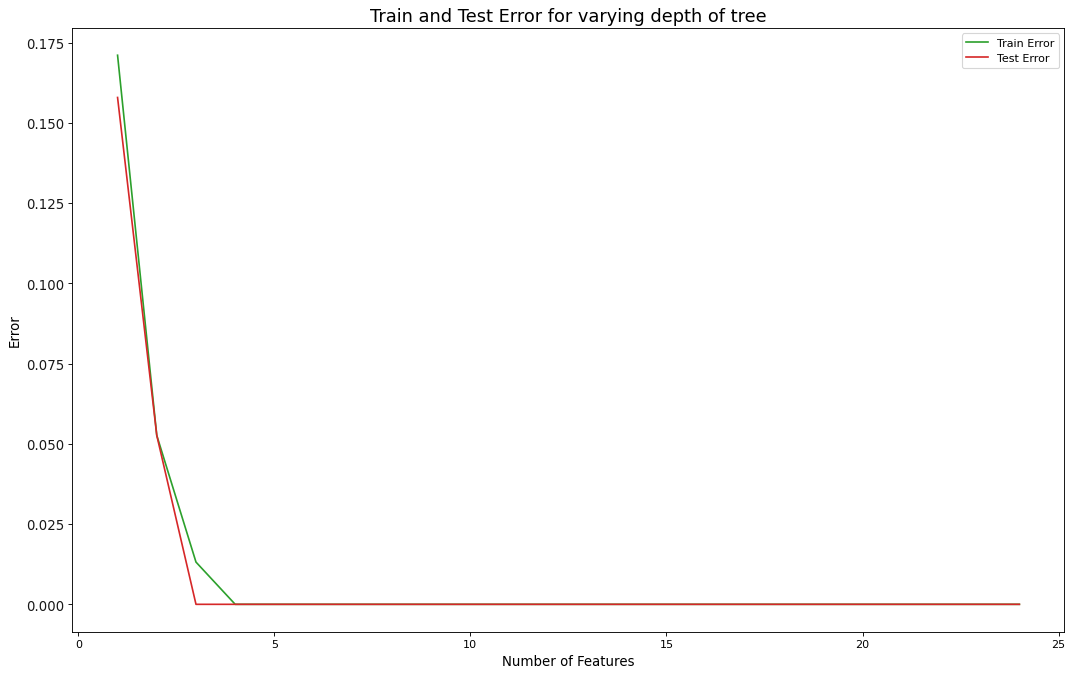

In [24]:
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(no_of_features, predicion_array['train_error'], color='tab:green', label='Train Error')
plt.plot(no_of_features, predicion_array['test_error'], color="tab:red", label='Test Error')
plt.ylabel("Error", fontsize=12)
plt.xlabel("Number of Features", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Error for varying depth of tree", fontsize=16)
plt.legend()
plt.show()

**Reason for this behavior of this graph**

Dataset is having only 95 rows which are further divided into train and test datasets making it very small considering the number of features which are 24. Therefore, based on the current state of dataset, it would not be possible to resaonably estimate overfitting in this case.

**Minimum depth value to avoid overfitting**

Making certain assumptions and trying to base the answer on that, the minimum number of features to be used that caused maximum accuracy of 100% is **4**, although it would be safer to use **5** or **6** as the max_depth value to avoid overfitting (if it caused by increase in the amount of data). On increasing the number of features, there is same accuracy. Although, this behavior is caused by the very small number of entries in the dataset, for a larger dataset, it would be easier to visualize how many features cause overfitting. In current dataset there are only 95 entries, therefore a reasonable analysis of overfitting can not be made



### (Extra) Hyperparameter Tuning with GridSearchCV

Using GridSearchCV of model selection module to verify the hyperparameter selection of optimal depth of the tree

In [28]:
# Considering only the max depth hyperparameter for tuning job
params = {'max_depth' : range(1, len(X.columns)+1)}

In [31]:
grid = GridSearchCV(decision_tree, param_grid = params, cv=10, verbose=1, n_jobs = 1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\erudi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.1s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=24),
             n_jobs=1, param_grid={'max_depth': range(1, 25)}, verbose=1)

In [32]:
grid.best_params_

{'max_depth': 6}

According to the Hyperparameter tuner the optimal value of depth is **6** which is consistent with the prior assumption about selection of a reasonable value. Although, it must be noted that on increasing the data to a sufficient number of rows, the situation can differ.

## Task 4 - Visualizing Tree with Graphviz
Used Graphviz to visualize the tree

### Tree for all the features (without specifying depth)

In [14]:
decision_tree = tree.DecisionTreeClassifier(criterion = "entropy")
decision_tree = decision_tree.fit(X,y)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

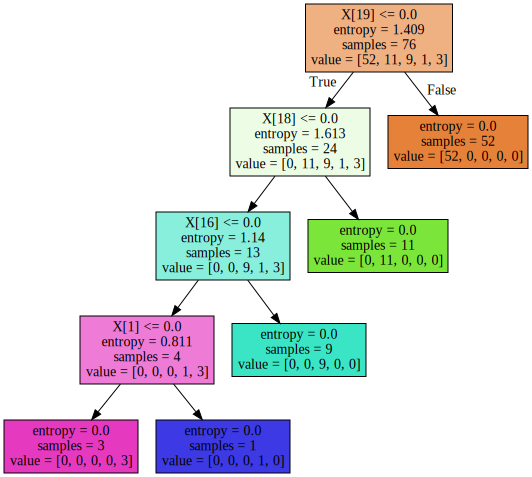

In [38]:
dot = tree.export_graphviz(decision_tree, out_file=None, filled = True)
graph = graphviz.Source(dot)
graph

### Tree for optimal value of depth


In [39]:
decision_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=4)
decision_tree = decision_tree.fit(X,y)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

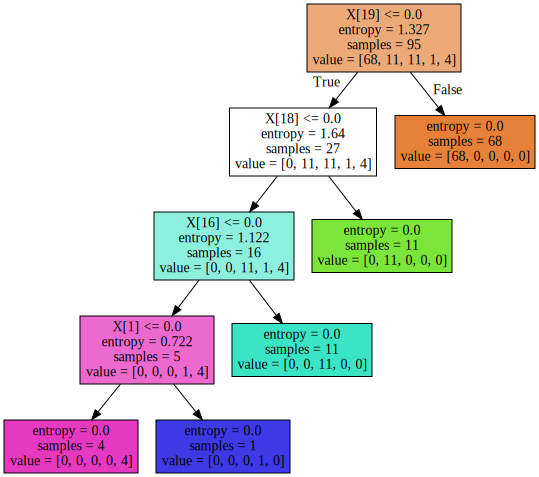

In [40]:
dot = tree.export_graphviz(decision_tree, out_file=None, filled=True)
graph = graphviz.Source(dot)
graph